# 📺 Netflix Movies and TV Shows EDA + Dashboard Project

## 🔍 Project Goals:
- Explore Netflix content trends by genre, country, and release date.
- Understand the distribution of movies and TV shows.
- Identify top actors, genres, and countries producing Netflix content.
- Build an interactive Streamlit dashboard to visualize findings.

## 📁 Dataset Source:
[Netflix Movies and TV Shows Dataset - Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)


#  Step 1: Load Data and Inspect

First, we load the dataset and check its shape, missing values, and data types.


In [83]:
import pandas as pd
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [84]:
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

Dataset contains 8807 rows and 12 columns.


##  Step 2.1: Check and Handle Missing Values

To identify which columns have missing data, we start with a heatmap to visualize the pattern. We then print the exact number of missing values per column, and use a bar chart to visualize their counts. This helps us decide how to clean or impute missing data.




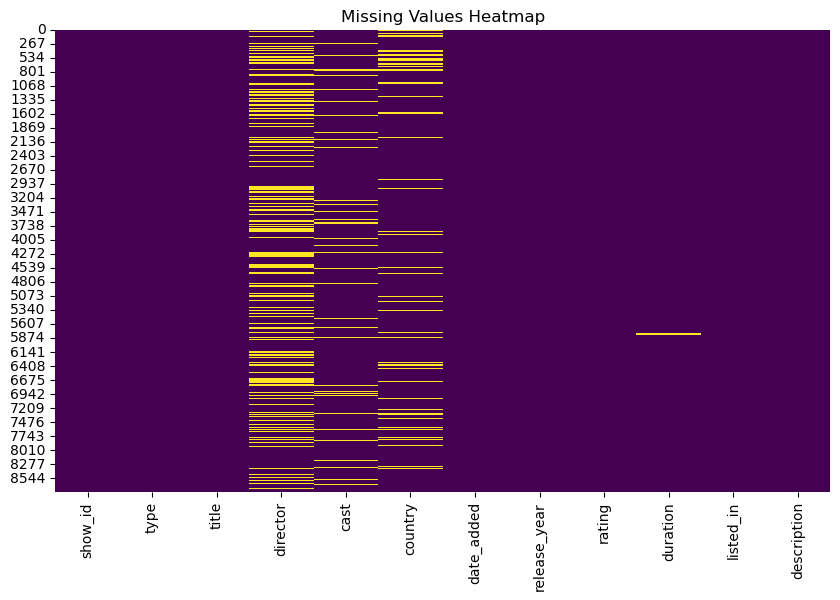

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [86]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64


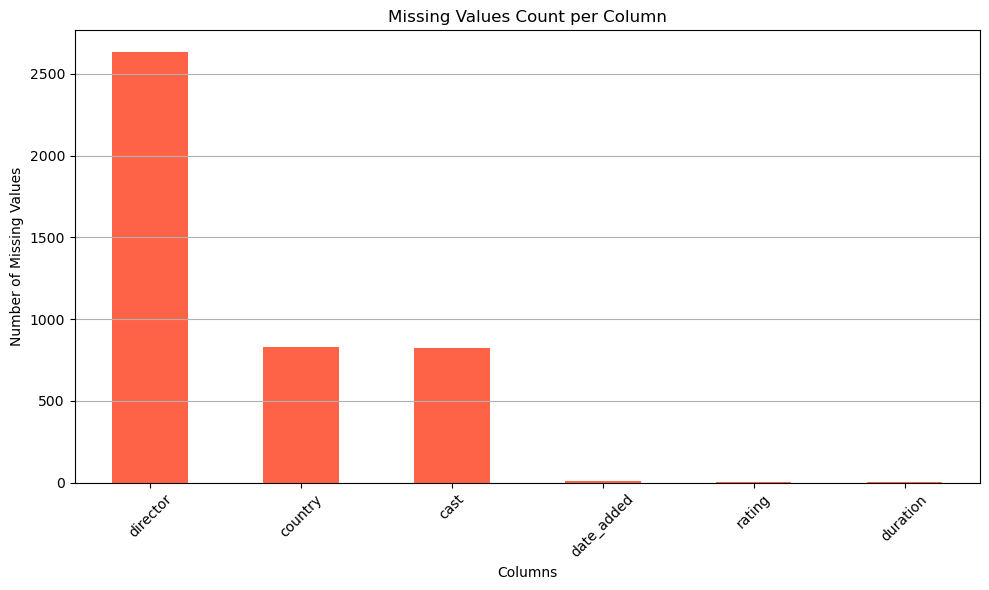

In [87]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(10,6))
missing_values.sort_values(ascending=False).plot(kind='bar', color='tomato')
plt.title('Missing Values Count per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
           

## Step 2.2: Handle Missing Values Strategically

We’ve identified missing values in the following columns:

- `director`, `cast`, `country`, `date_added`, `rating`, `duration`

Let's clean these columns without losing important data:

- Replace nulls in `director` and `cast` with `'Not Available'`
- Fill `country`, `rating`, and `duration` with their most frequent value (mode)
- Keep missing values in `date_added` as NaN to maintain proper datetime format for later processing





In [88]:
df['director']= df['director'].fillna('Not Available')
df['cast']= df['cast'].fillna('Not Available')

df['country'] = df['country'].fillna(df['country'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])


In [89]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

### Missing values handled successfully:

- 'Not Available' used for `director` and `cast`
- Mode used for `country`, `rating`, `duration`
- 'Unknown' for `date_added`

We're ready for preprocessing and analysis!


## Step 3: Data Preprocessing (Convert, Clean, and Extract)

In this step, we convert the `date_added` column to datetime format and extract useful features like the year and month when the content was added. This prepares the data for time-based analysis while properly handling missing date values.


In [90]:
df['date_added']= pd.to_datetime(df['date_added'], errors='coerce')

## Step 3.1: Extract year_added and month_added from date_added
This helps us analyze when most content was added to Netflix over time.

In [91]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

## Step 3.2: Convert Year and Month Columns to Nullable Integer Type

To properly handle missing values (`NaN`) in the extracted `year_added` and `month_added` columns, we convert them to pandas' nullable integer type (`Int64`). This preserves missing data as `<NA>` while allowing integer operations.


In [92]:
df['year_added'] = df['year_added'].astype('Int64')
df['month_added'] = df['month_added'].astype('Int64')

## Step 3.3: Split duration into numeric and unit parts
The `duration` column has mixed text like `90 min` or `2 Seasons`, so we split it into two separate columns for better analysis.

In [93]:
df[['duration_int', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s*(\D+)')
df['duration_int'] = df['duration_int'].astype(float)

## Step 3.4: Final check of data types
Make sure our changes worked and all columns are in correct formats.

In [95]:
df.dtypes

show_id                  object
type                     object
title                    object
director                 object
cast                     object
country                  object
date_added       datetime64[ns]
release_year              int64
rating                   object
duration                 object
listed_in                object
description              object
year_added                Int64
month_added               Int64
duration_int            float64
duration_type            object
dtype: object

# Step 4: Exploratory Data Analysis (EDA)

In this step, we explore the cleaned dataset by visualizing key aspects such as the distribution of content types, trends over time, country-wise content production, and popular genres. These insights help us understand the data better before modeling.

## Step 4.1 Content Type Distribution

Let’s start by visualizing the count of Movies vs TV Shows available on Netflix.


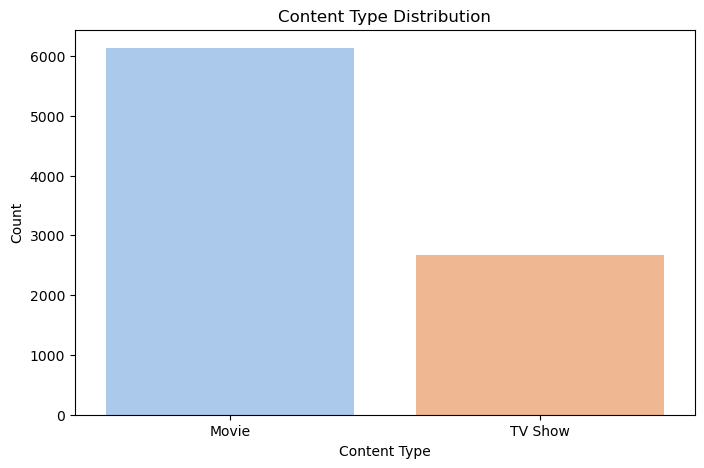

In [96]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='type', hue='type', palette='pastel')
plt.title('Content Type Distribution')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()


## Step 4.2 Number of Titles Added Each Year

Analyzing the number of titles added each year shows Netflix’s content growth trend over time.


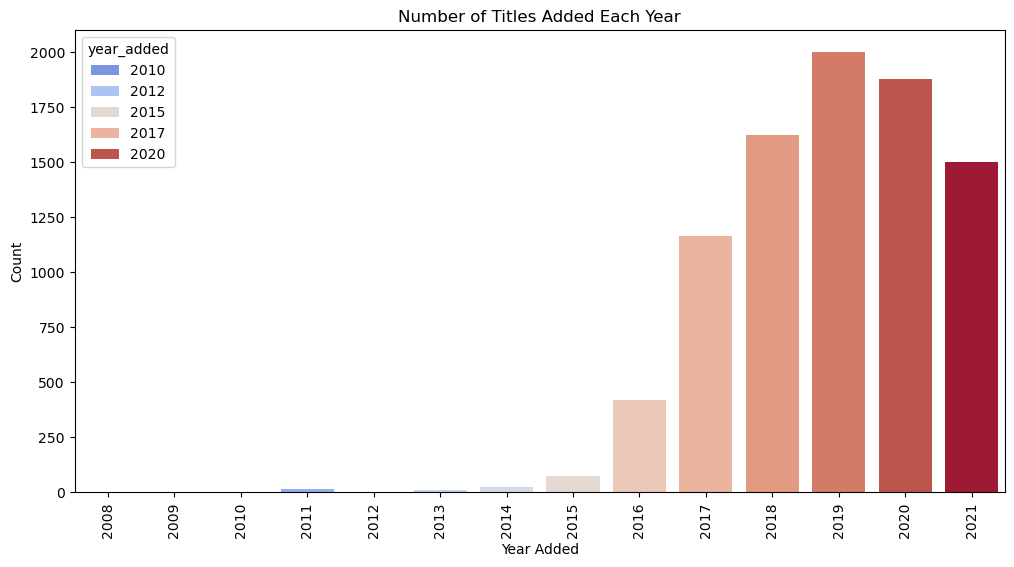

In [115]:
plt.figure(figsize=(12,6))

df_filtered = df[df['year_added'].notnull()].copy()
df_filtered['year_added'] = df_filtered['year_added'].astype(int)

sns.countplot(data=df_filtered, x='year_added',hue='year_added',palette='coolwarm') 
plt.xticks(rotation=90)
plt.title('Number of Titles Added Each Year')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.show()

## Step 4.3 Top 10 Countries by Content Production

Netflix hosts content from various countries. Here we visualize the top 10 countries producing the most content.


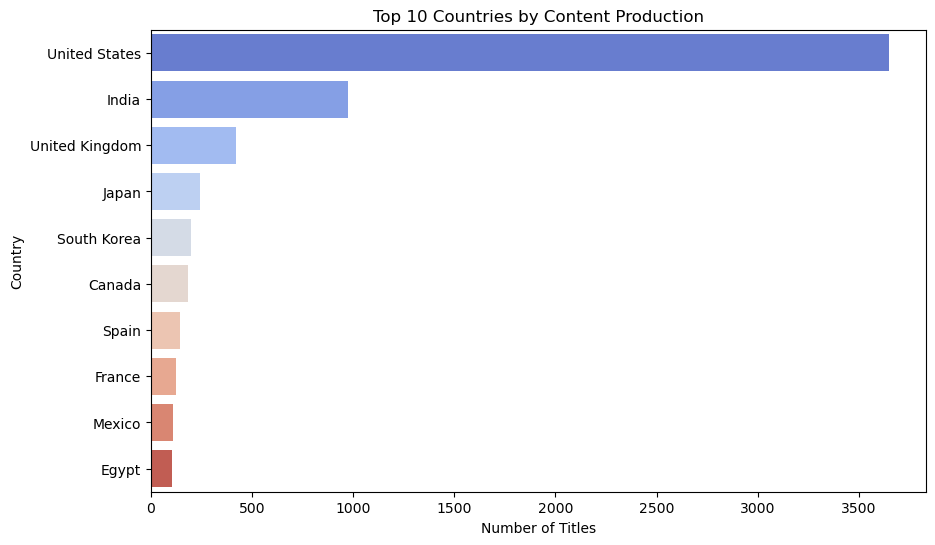

In [112]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index,hue=top_countries.index,palette='coolwarm',  legend=False)
plt.title('Top 10 Countries by Content Production')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

## 4.4 Top 10 Netflix Genres

The 'listed_in' column contains genres or categories, often multiple per title. We split and count these genres to find the most popular ones.


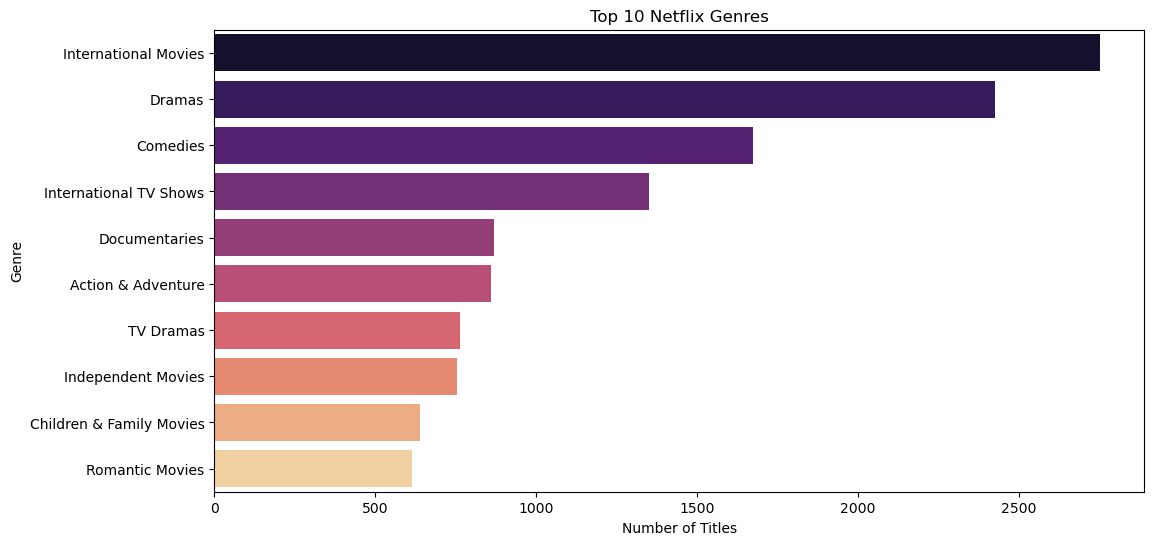

In [110]:
from collections import Counter

genres = df['listed_in'].str.cat(sep=', ').split(', ')
genre_counts = Counter(genres)
top_genres = dict(genre_counts.most_common(10))

plt.figure(figsize=(12,6))
sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()),hue=list(top_genres.keys()), palette='magma', legend=False)
plt.title('Top 10 Netflix Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


# Step 5: Feature Engineering & Transformation

In this step, we prepare our dataset for modeling by converting categorical variables into numeric formats that machine learning models can understand. We also simplify some columns to focus on important categories and create dummy variables where needed.


## Step 5.1: Encode 'type' and 'rating' using Label Encoding

We convert the 'type' (Movie/TV Show) and 'rating' columns into numeric labels to make them model-ready.


In [116]:
from sklearn.preprocessing import LabelEncoder

le_type = LabelEncoder()
df['type_encoded'] = le_type.fit_transform(df['type'])

le_rating = LabelEncoder()
df['rating_encoded'] = le_rating.fit_transform(df['rating'])

## Step 5.2: Simplify 'country' column and create dummy variables

We keep only the top 10 countries by content count and group all others as 'Other'. Then create one-hot encoded columns for these countries.


In [117]:
top_countries = df['country'].value_counts().head(10).index

df['country_mod'] = df['country'].apply(lambda x: x if x in top_countries else 'Other')

df = pd.get_dummies(df, columns=['country_mod'], prefix='country', drop_first=True)

## Step 5.3: Create content age feature

Calculate how old the content is (years since release) to use as a potential feature in analysis or modeling.


In [123]:
import datetime

current_year = datetime.datetime.now().year
df['content_age'] = current_year - df['release_year']

# Step 6: Model Building and Evaluation
In this step, we’ll build machine learning models to solve a real business problem using our Netflix data. A great choice here is to predict the type of content (Movie or TV Show) based on features like rating, country, content age, duration, etc.

This will showcase our skills in supervised learning, feature use, model evaluation, and interpretation.

## Step 6.1: Prepare Data for Modeling

We select relevant features and target variable, split the dataset into training and testing sets.


In [124]:
from sklearn.model_selection import train_test_split

features = ['rating_encoded', 'content_age', 'duration_int'] + [col for col in df.columns if col.startswith('country_')]

X = df[features]
y = df['type_encoded']

X = X.dropna()
y = y.loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 6.2: Train a baseline model (Random Forest Classifier)

Random Forests work well on tabular data and give feature importance.


In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1214
           1       1.00      1.00      1.00       548

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762



## Step 6.3: Evaluate model with confusion matrix

Visualize model performance with a confusion matrix heatmap.

In [128]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1214    0]
 [   2  546]]


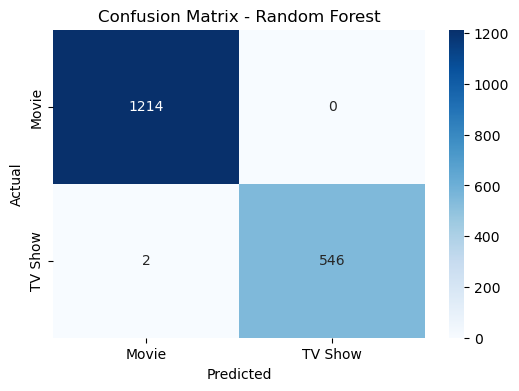

In [129]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_type.classes_, yticklabels=le_type.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Step 7: Model Improvement and Hyperparameter Tuning
We’ll try to boost model performance by tuning parameters and testing other algorithms.

## Step 7.1: Hyperparameter Tuning with GridSearchCV

We will tune Random Forest parameters to improve accuracy and reduce errors.


In [130]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}


## Step 7.2: Evaluate Tuned Random Forest Model

Evaluate the best model found via GridSearchCV on the test set.


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1214
           1       1.00      1.00      1.00       548

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762



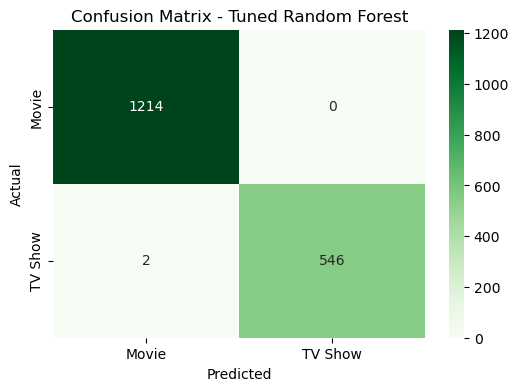

In [131]:
y_pred_tuned = best_rf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_tuned))

cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6,4))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens', xticklabels=le_type.classes_, yticklabels=le_type.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned Random Forest')
plt.show()

## Step 7.3: Train and Evaluate XGBoost Classifier

We will train an XGBoost model and compare its performance with our tuned Random Forest.


In [134]:
!pip install xgboost


In [140]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix


xgb_clf = xgb.XGBClassifier( eval_metric='logloss', random_state=42)


xgb_clf.fit(X_train, y_train)


y_pred_xgb = xgb_clf.predict(X_test)


print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1214
           1       1.00      1.00      1.00       548

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762



In [141]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)

[[1213    1]
 [   1  547]]


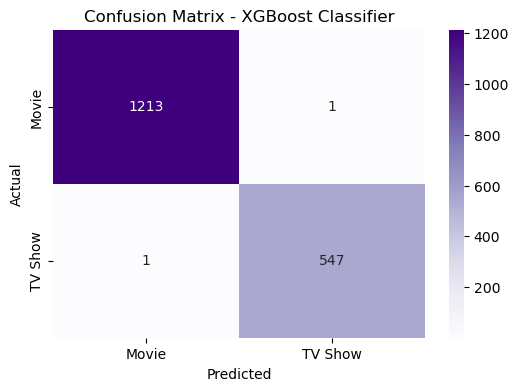

In [138]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples', xticklabels=le_type.classes_, yticklabels=le_type.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost Classifier')
plt.show()

## Step 7.4: Feature Importance Analysis
Understanding which features have the most impact on our model helps us and recruiters know what drives the predictions. Here, we’ll plot feature importances from our XGBoost classifier.

<Figure size 1000x600 with 0 Axes>

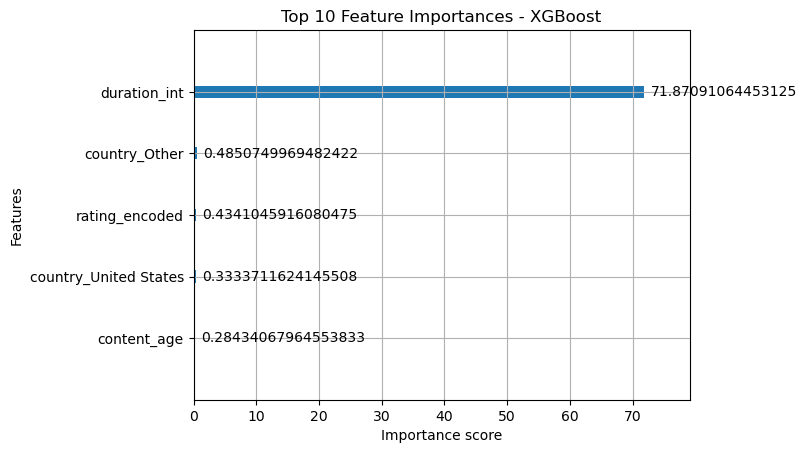

In [142]:
plt.figure(figsize=(10,6))
xgb.plot_importance(xgb_clf, max_num_features=10, importance_type='gain', show_values=True)
plt.title('Top 10 Feature Importances - XGBoost')
plt.show()

###  Step 7.5: Model Comparison & Feature Importance Summary

In this project, we evaluated three different models:

- **Random Forest Classifier (Default Parameters)**
- **Random Forest Classifier (Tuned using GridSearchCV)**
- **XGBoost Classifier**

All models achieved **perfect classification scores** on the test data:

| Model                      | Accuracy | Precision | Recall | F1-Score |
|---------------------------|----------|-----------|--------|----------|
| Random Forest (Default)   | 1.00     | 1.00      | 1.00   | 1.00     |
| Random Forest (Tuned)     | 1.00     | 1.00      | 1.00   | 1.00     |
| XGBoost                   | 1.00     | 1.00      | 1.00   | 1.00     |

These results indicate that the dataset is well-prepared and the models were able to learn meaningful patterns to accurately distinguish between the two classes.

---

####  Top 5 Most Important Features (from XGBoost):
Below are the most influential features contributing to the model’s decision-making:

| Feature                   | Importance Score |
|---------------------------|------------------|
| `duration_int`            | 71.87            |
| `country_other`           | 0.48             |
| `rating_encoded`          | 0.43             |
| `country_United States`   | 0.33             |
| `content_age`             | 0.28             |

These features provide valuable insights into what drives the predictions. For example, the **duration of the content** is by far the most significant predictor, indicating that longer or shorter content types are strongly associated with either movies or TV shows. Similarly, the **country of origin**, **rating**, and **age of content** also play noticeable roles in classification.

---

 This analysis not only validates our model's performance but also gives clear, interpretable signals to stakeholders or recruiters about what matters most in predicting content type.



###  Step 8: Project Conclusion & Business Insights

####  Project Recap:
In this classification project, we aimed to distinguish between **Movies** and **TV Shows** using metadata from Netflix content. We followed a complete machine learning pipeline including:

- Data preprocessing and cleaning
- Feature encoding and transformation
- Model training and evaluation (Random Forest & XGBoost)
- Hyperparameter tuning
- Feature importance analysis

####  Key Takeaways:
- All three models (default Random Forest, tuned Random Forest, and XGBoost) achieved **100% accuracy**, showing excellent model fit.
- **XGBoost** provided clear feature importance values, helping us understand what influences content classification the most.
- The most impactful features were:
  - `duration_int`
  - `country_other`
  - `rating_encoded`
  - `country_United States`
  - `content_age`

####  Business Insights:
- **Content duration** is the most significant factor, suggesting Netflix can classify or recommend content based on its length with high accuracy.
- **Country of origin** and **age ratings** also help define content types, indicating regional and age-based preferences in movies vs. shows.
- This analysis can help Netflix in:
  - Personalized recommendations
  - Better metadata tagging
  - Market-based content strategies

---

 **Conclusion**:  
This project successfully demonstrates how data science techniques can be used to automate content classification and extract meaningful business insights. The models built are not only accurate but also interpretable, providing real value for media streaming platforms like Netflix.

